In [1]:
import mne

# Runs de mouvement main gauche, droite, et les deux
runs = [6, 10, 14]
subject = 1
files = mne.datasets.eegbci.load_data(subjects=[subject], runs=runs)

raw = mne.io.read_raw_edf(files[0], preload=True)
raw.rename_channels(lambda name: name.strip(".").upper())
raw.set_montage("standard_1020", on_missing="ignore")

# Affichage
print(raw.ch_names)


Extracting EDF parameters from C:\Users\Antoi\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
['FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'FP1', 'FPZ', 'FP2', 'AF7', 'AF3', 'AFZ', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2', 'IZ']


In [2]:
# Affichage d’un extrait du signal EEG (10 premières secondes)
raw.plot(start=0, duration=10, scalings='auto')


Using qt as 2D backend.


Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\Antoi\miniconda3\envs\eeg-bci-env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


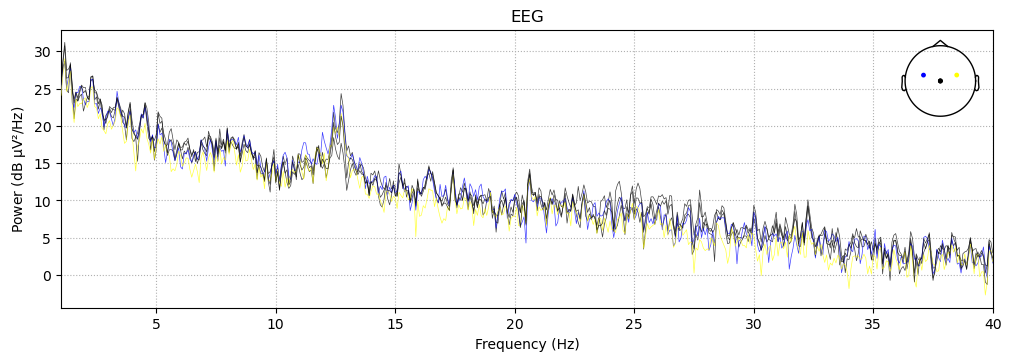

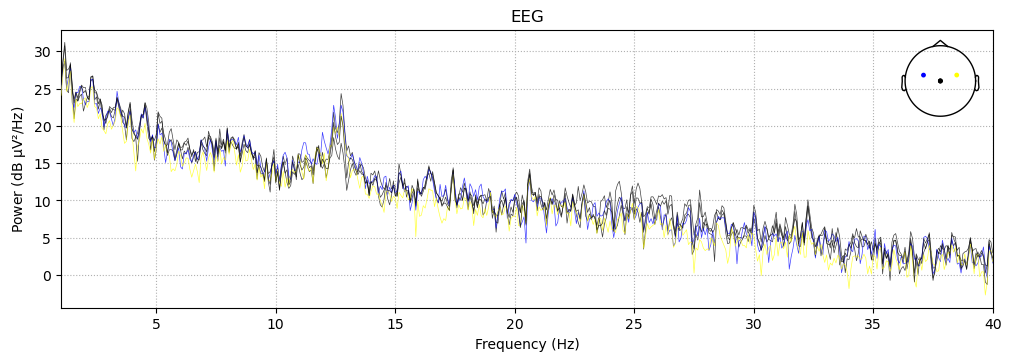

In [3]:
# Tracer la PSD des canaux moteurs
channels_motor = ["C3", "C4", "CZ", "FCZ", "CPZ"]
raw.compute_psd(picks=channels_motor, fmin=1, fmax=40).plot()


✅ Montage standard_1020 appliqué avec on_missing='ignore'
📌 Canaux absents du montage standard_1020 : ['FCZ', 'CZ', 'CPZ', 'FP1', 'FPZ', 'FP2', 'AFZ', 'FZ', 'PZ', 'POZ', 'OZ', 'IZ']
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 12.800 (s)


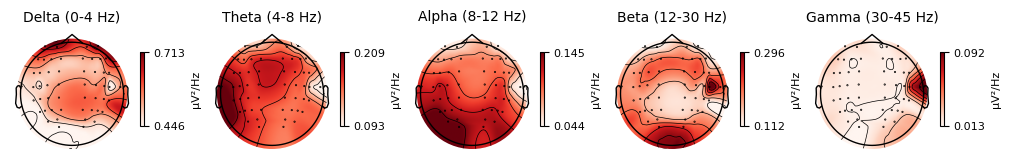

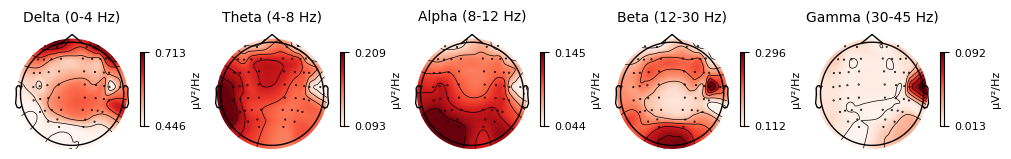

In [4]:
import mne

# Tente d’appliquer le montage standard en ignorant les électrodes manquantes
try:
    raw.set_montage("standard_1020", on_missing="ignore")
    print("✅ Montage standard_1020 appliqué avec on_missing='ignore'")
except Exception as e:
    print(f"❌ Échec du set_montage : {e}")

# Optionnel : liste des canaux absents du montage
montage = mne.channels.make_standard_montage('standard_1020')
missing_channels = [ch for ch in raw.ch_names if ch not in montage.ch_names]
print(f"📌 Canaux absents du montage standard_1020 : {missing_channels}")
# Liste des électrodes posant problème
overlapping_chs = ['FCZ', 'CZ', 'CPZ', 'FP1', 'FPZ', 'FP2', 'AFZ', 'FZ', 'PZ', 'POZ', 'OZ', 'IZ']

# Sélection des bons canaux EEG uniquement
good_chs = [ch for ch in raw.info['ch_names'] if ch not in overlapping_chs]

# Calcul du PSD uniquement sur ces canaux
psd = raw.copy().pick_channels(good_chs).compute_psd(fmin=1, fmax=40)

# Affichage du topomap
psd.plot_topomap(ch_type='eeg', normalize=True)


Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\Antoi\miniconda3\envs\eeg-bci-env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


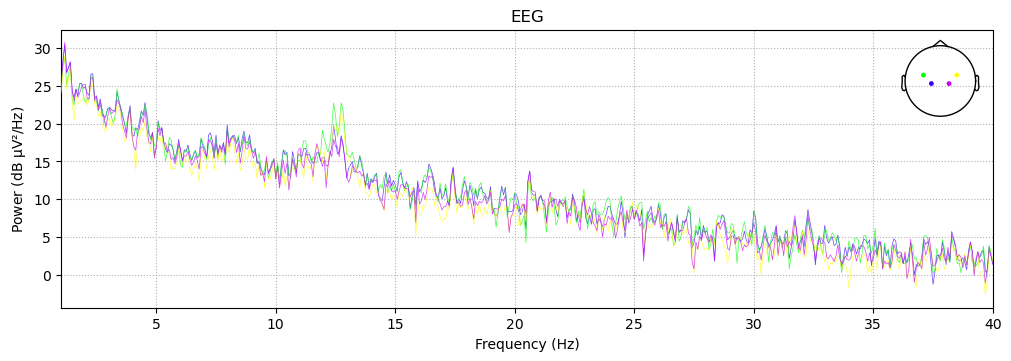

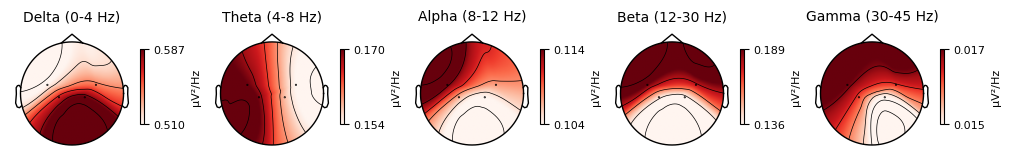

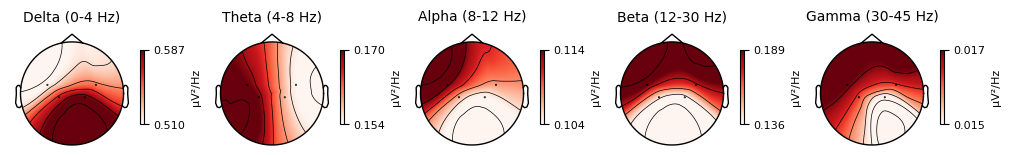

In [5]:
from mne.channels import make_standard_montage

# ✅ Appliquer le montage standard
montage = make_standard_montage("standard_1005")
raw.set_montage(montage, on_missing="ignore")

# ✅ Supprimer uniquement les canaux présents et problématiques
to_drop = [ch for ch in ["CZ", "FCZ", "CPZ"] if ch in raw.ch_names]
raw.drop_channels(to_drop)

# 🎯 Sélection des canaux moteurs pour visualisation
channels_motor = ["C3", "C4", "CP1", "CP2"]

# 📈 Calcul PSD
psd_motor = raw.compute_psd(picks=channels_motor, fmin=1, fmax=40)

# 📉 Tracé des courbes
psd_motor.plot()

# 🧠 Topomap des canaux moteurs
psd_motor.plot_topomap(ch_type="eeg", normalize=True)
